In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import os
import sys

import matplotlib.pyplot as plt

repo_root = os.path.join(os.getcwd(), '../code')
sys.path.append(repo_root)

import imagenet
import utils

## Creating a new ImageNetData object

By default, the object lazily downloads all required data to a cache directory on the local disk when the data is needed for a method invocation. By default, this cache directory is in `data/cache` (which is git-ignored in our repository). But the cache directory can also be changed, which should be useful if we have the full ImageNet dataset somewhere on the millennium machines.

For working with PyWren / AWS Lambda, it is probably better to avoid writing to disk. This is also possible by passing in `cache_on_local_disk=False`.

In [2]:
imgnet = imagenet.ImageNetData()

/Users/ludwig/research/deep_learning/imagenet_2/data/cache/metadata/imagenet_metadata_2018-09-14_01-26-58_UTC.pickle not available locally, downloading from S3 ... done (downloaded replica metadata/imagenet_metadata_2018-09-14_01-26-58_UTC.pickle_replica03-10 )
Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/metadata/imagenet_metadata_2018-09-14_01-26-58_UTC.pickle ... done


The main data structure in the resulting object is a dictionary from class name (WordNet ID) to image filenames belonging to the respective class.

### Training set files

In [3]:
len(imgnet.train_imgs_by_wnid)

1000

In [4]:
list(imgnet.train_imgs_by_wnid.keys())[:10]

['n01440764',
 'n01443537',
 'n01484850',
 'n01491361',
 'n01494475',
 'n01496331',
 'n01498041',
 'n01514668',
 'n01514859',
 'n01518878']

In [5]:
len(imgnet.train_imgs_by_wnid['n01443537'])

1300

In [6]:
imgnet.train_imgs_by_wnid['n01443537'][:10]

['n01443537_16282.JPEG',
 'n01443537_21203.JPEG',
 'n01443537_21479.JPEG',
 'n01443537_8693.JPEG',
 'n01443537_8401.JPEG',
 'n01443537_12568.JPEG',
 'n01443537_4376.JPEG',
 'n01443537_9444.JPEG',
 'n01443537_2858.JPEG',
 'n01443537_7947.JPEG']

In [7]:
imgnet.get_all_train_image_names()[:10]

['n01440764_10026.JPEG',
 'n01440764_10027.JPEG',
 'n01440764_10029.JPEG',
 'n01440764_10040.JPEG',
 'n01440764_10042.JPEG',
 'n01440764_10043.JPEG',
 'n01440764_10048.JPEG',
 'n01440764_10066.JPEG',
 'n01440764_10074.JPEG',
 'n01440764_1009.JPEG']

### Validation set files

In [8]:
len(imgnet.val_imgs_by_wnid)

1000

In [9]:
list(imgnet.val_imgs_by_wnid.keys())[:10]

['n01440764',
 'n01443537',
 'n01484850',
 'n01491361',
 'n01494475',
 'n01496331',
 'n01498041',
 'n01514668',
 'n01514859',
 'n01518878']

In [10]:
len(imgnet.val_imgs_by_wnid['n01443537'])

50

In [11]:
imgnet.val_imgs_by_wnid['n01443537'][:10]

['ILSVRC2012_val_00028713.JPEG',
 'ILSVRC2012_val_00044095.JPEG',
 'ILSVRC2012_val_00005870.JPEG',
 'ILSVRC2012_val_00034386.JPEG',
 'ILSVRC2012_val_00019459.JPEG',
 'ILSVRC2012_val_00000307.JPEG',
 'ILSVRC2012_val_00002241.JPEG',
 'ILSVRC2012_val_00000262.JPEG',
 'ILSVRC2012_val_00045761.JPEG',
 'ILSVRC2012_val_00011914.JPEG']

In [12]:
imgnet.wnid_by_val_filename['ILSVRC2012_val_00034386.JPEG']

'n01443537'

In [13]:
imgnet.get_all_val_image_names()[:10]

['ILSVRC2012_val_00000293.JPEG',
 'ILSVRC2012_val_00002138.JPEG',
 'ILSVRC2012_val_00003014.JPEG',
 'ILSVRC2012_val_00006697.JPEG',
 'ILSVRC2012_val_00007197.JPEG',
 'ILSVRC2012_val_00009111.JPEG',
 'ILSVRC2012_val_00009191.JPEG',
 'ILSVRC2012_val_00009346.JPEG',
 'ILSVRC2012_val_00009379.JPEG',
 'ILSVRC2012_val_00009396.JPEG']

### Test set files

In [14]:
len(imgnet.test_filenames)

100000

In [15]:
imgnet.test_filenames[:10]

['ILSVRC2012_test_00000001.JPEG',
 'ILSVRC2012_test_00000002.JPEG',
 'ILSVRC2012_test_00000003.JPEG',
 'ILSVRC2012_test_00000004.JPEG',
 'ILSVRC2012_test_00000005.JPEG',
 'ILSVRC2012_test_00000006.JPEG',
 'ILSVRC2012_test_00000007.JPEG',
 'ILSVRC2012_test_00000008.JPEG',
 'ILSVRC2012_test_00000009.JPEG',
 'ILSVRC2012_test_00000010.JPEG']

In [16]:
list(imgnet.test_batches.keys())[:5]

['66210c7d1a50f1349be7b9577f421130b34636ea512b6466c2c9f7eb2408cc23',
 'dfe108e0734a96858db7a015ecd1a22b7b5113b9fd3da4ceff15305e851ba2e1',
 '4e5a5971fa97c7dd742076dbd3025a74754fe8997f24faa30acb92d349fb633b',
 '6d6d3486dda14e24b71395f45a9752990ef24388c604f5bb96c7cee30fae08bf',
 'a9159b8168ed62ec8e09bb5ef628a10f54dfdff2f15aaac801da6cc04d229b39']

In [17]:
imgnet.test_batches['66210c7d1a50f1349be7b9577f421130b34636ea512b6466c2c9f7eb2408cc23'][:5]

['ILSVRC2012_test_00000001.JPEG',
 'ILSVRC2012_test_00000002.JPEG',
 'ILSVRC2012_test_00000003.JPEG',
 'ILSVRC2012_test_00000004.JPEG',
 'ILSVRC2012_test_00000005.JPEG']

In [18]:
imgnet.test_batch_by_filename['ILSVRC2012_test_00000004.JPEG']

'66210c7d1a50f1349be7b9577f421130b34636ea512b6466c2c9f7eb2408cc23'

## Downloading image data

The ImageNetData object also supports downloading image data for a given image.

### Training set images

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-train-individual/n01443537/n01443537_8401.JPEG ... done


<IPython.core.display.Javascript object>


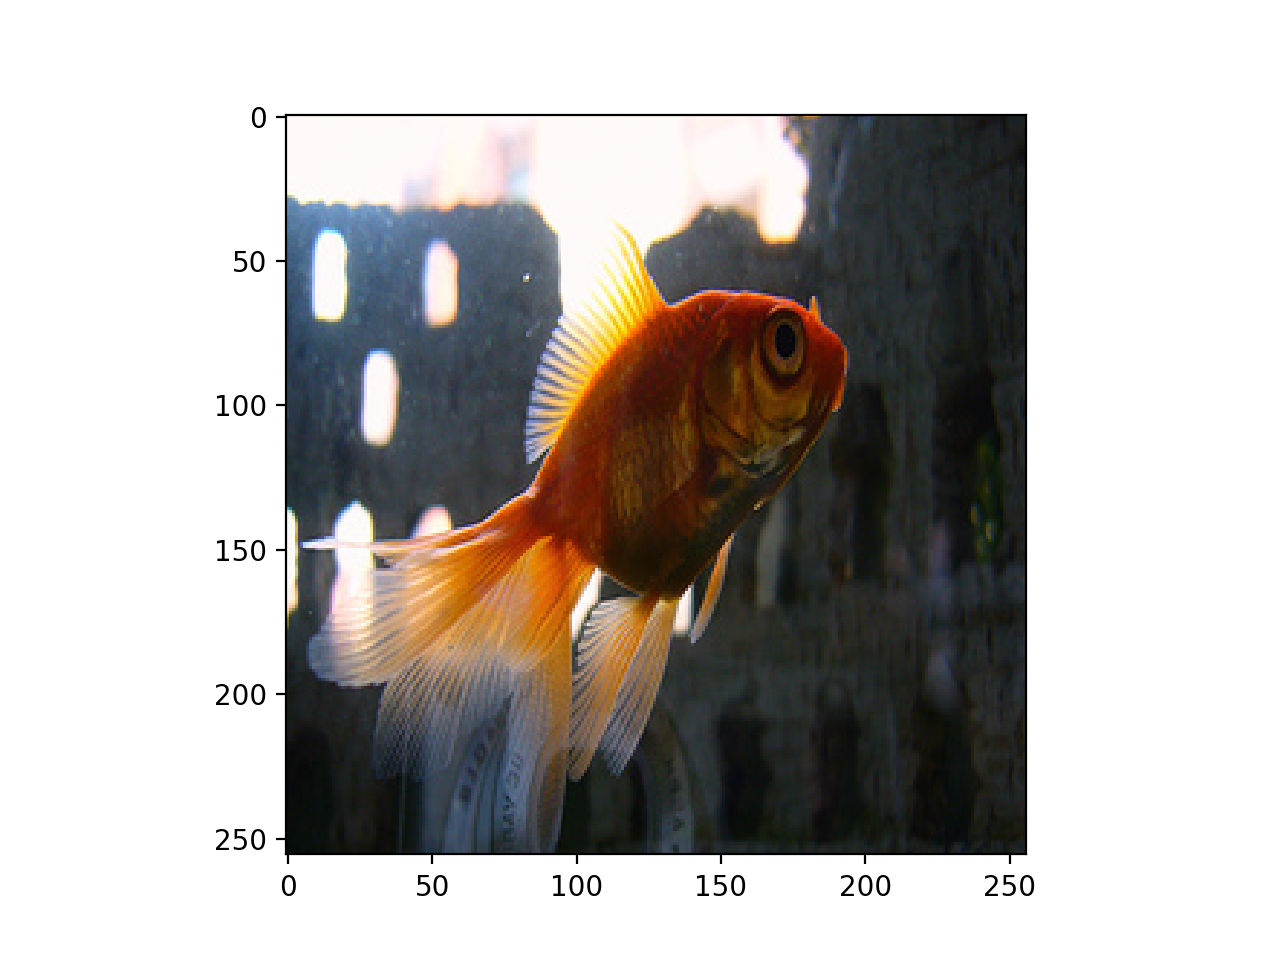

In [19]:
tmpimg = imgnet.load_image('n01443537_8401.JPEG', size='scaled_256')

plt.figure()
plt.imshow(tmpimg)
plt.show()

### Validation set images

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-validation-individual/n01443537/ILSVRC2012_val_00005870.JPEG ... done


<IPython.core.display.Javascript object>


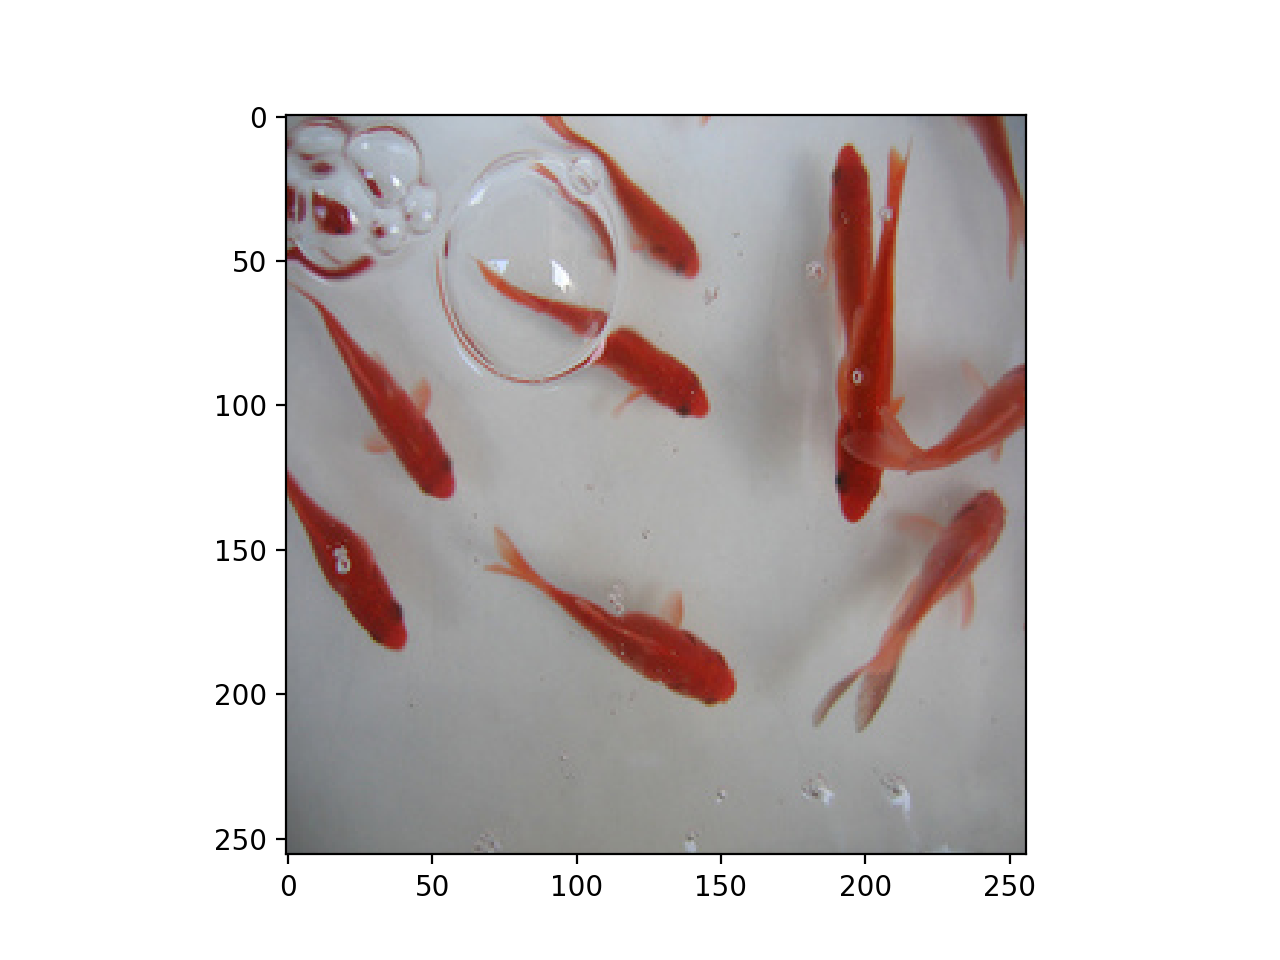

In [20]:
tmpimg = imgnet.load_image('ILSVRC2012_val_00005870.JPEG', size='scaled_256')

plt.figure()
plt.imshow(tmpimg)
plt.show()

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet_validation_flat/ILSVRC2012_val_00005870.JPEG ... done


<IPython.core.display.Javascript object>


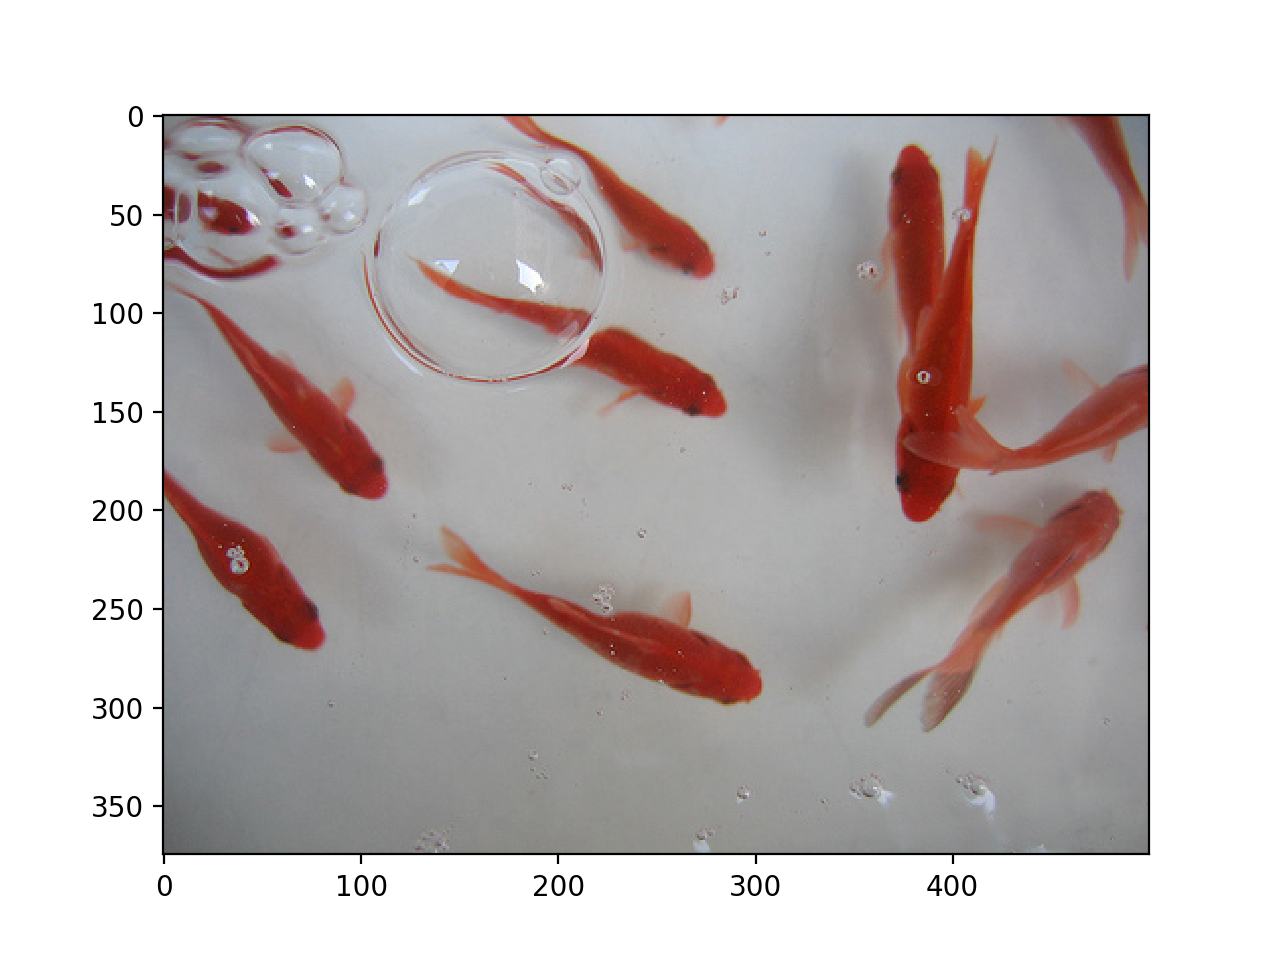

In [21]:
tmpimg = imgnet.load_image('ILSVRC2012_val_00005870.JPEG', size='scaled_500')

plt.figure()
plt.imshow(tmpimg)
plt.show()

### Test set images

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-test-scaled/ILSVRC2012_test_00000002.JPEG ... done


<IPython.core.display.Javascript object>


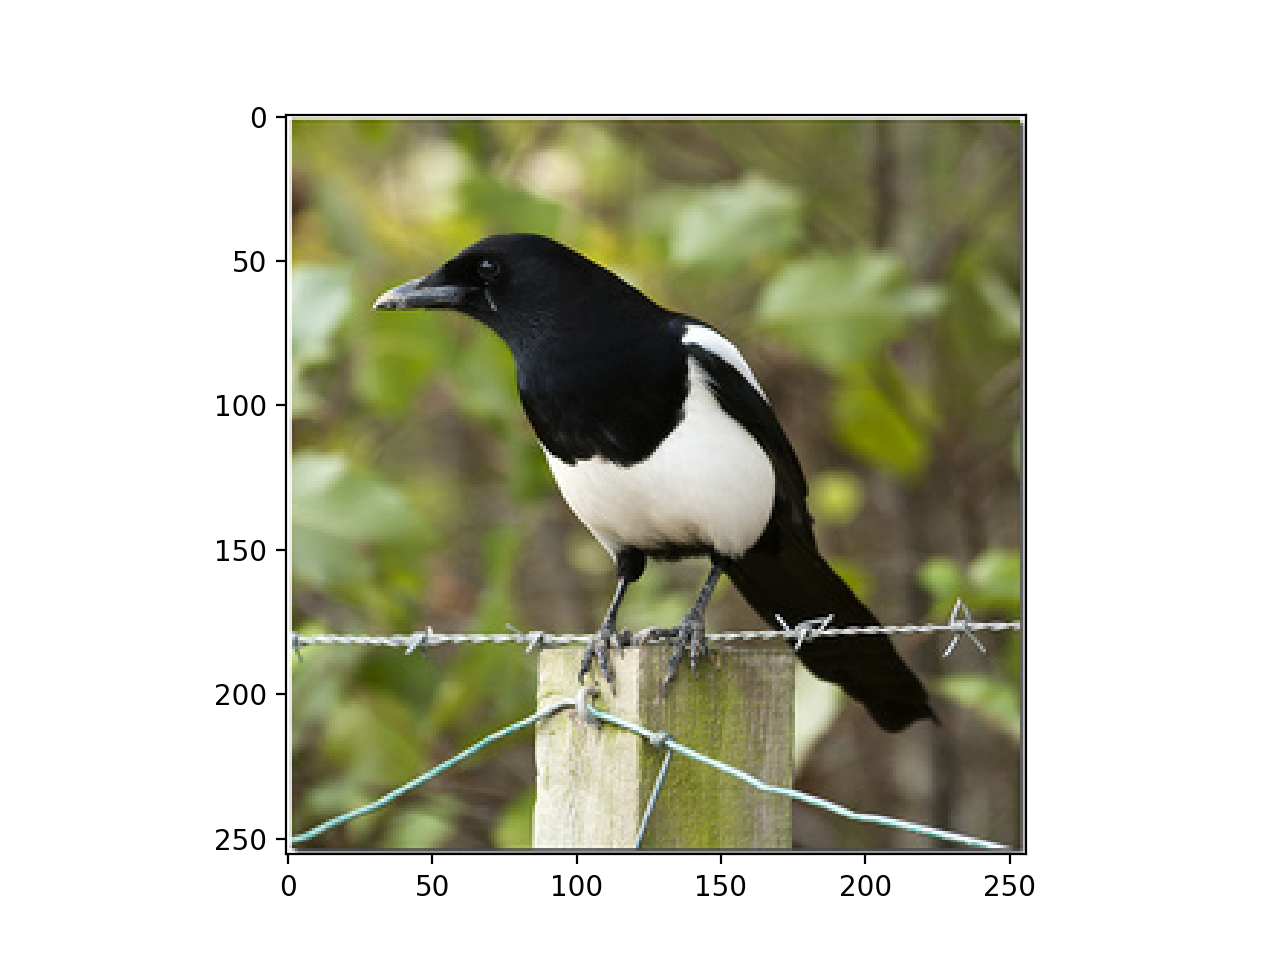

In [22]:
tmpimg = imgnet.load_image('ILSVRC2012_test_00000002.JPEG', size='scaled_256')

plt.figure()
plt.imshow(tmpimg)
plt.show()

### Unified batch image loading

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-train-individual/n01443537/n01443537_8401.JPEG ... done
Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-train-individual/n01498041/n01498041_13465.JPEG ... done
Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-train-individual/n01498041/n01498041_11953.JPEG ... done
Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-validation-individual/n01443537/ILSVRC2012_val_00005870.JPEG ... done
Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-test-scaled/ILSVRC2012_test_00000002.JPEG ... done
Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-test-scaled/ILSVRC2012_test_00000004.JPEG ... done


<IPython.core.display.Javascript object>


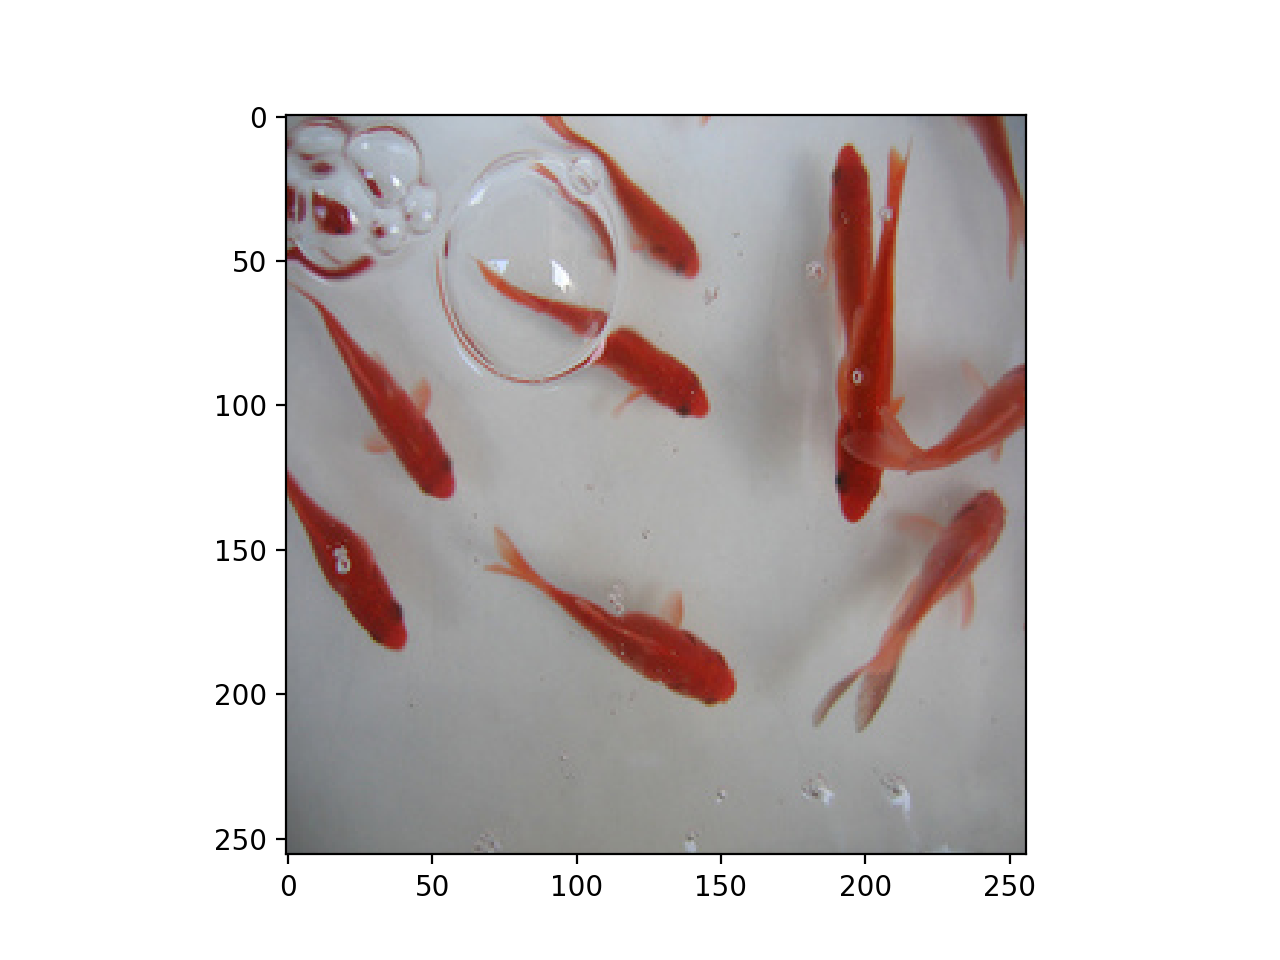

<IPython.core.display.Javascript object>


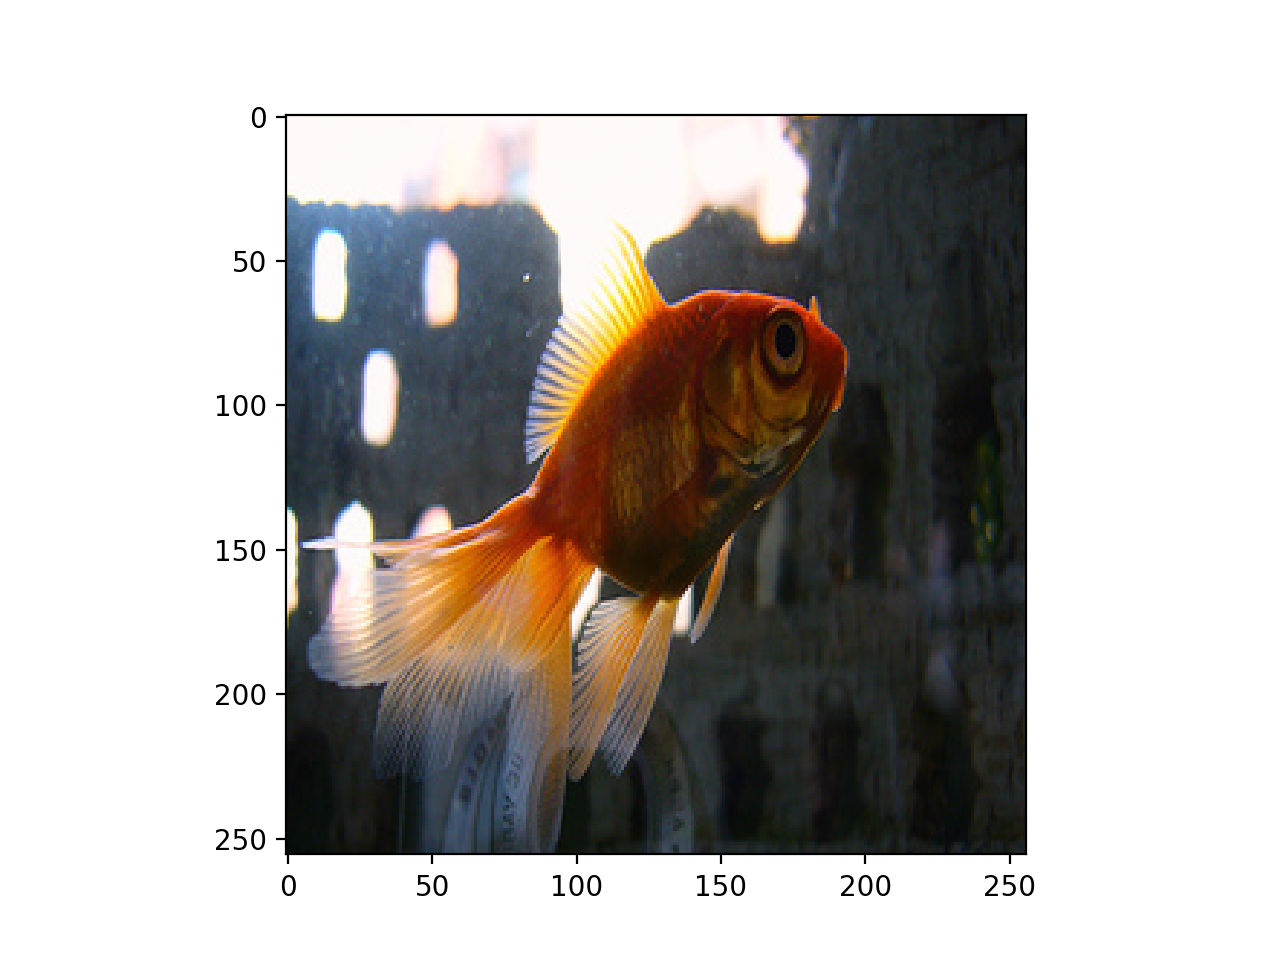

<IPython.core.display.Javascript object>


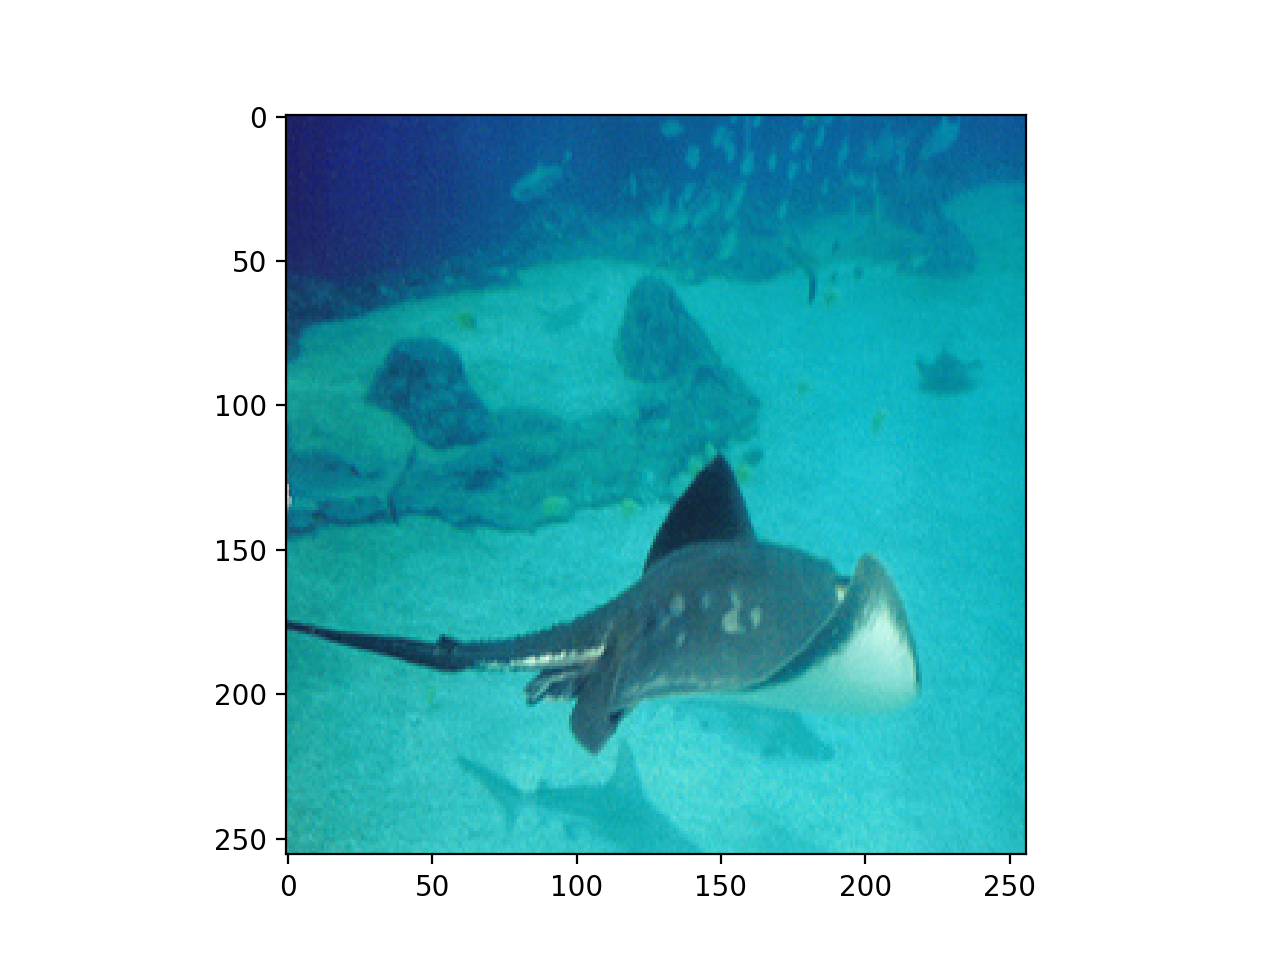

<IPython.core.display.Javascript object>


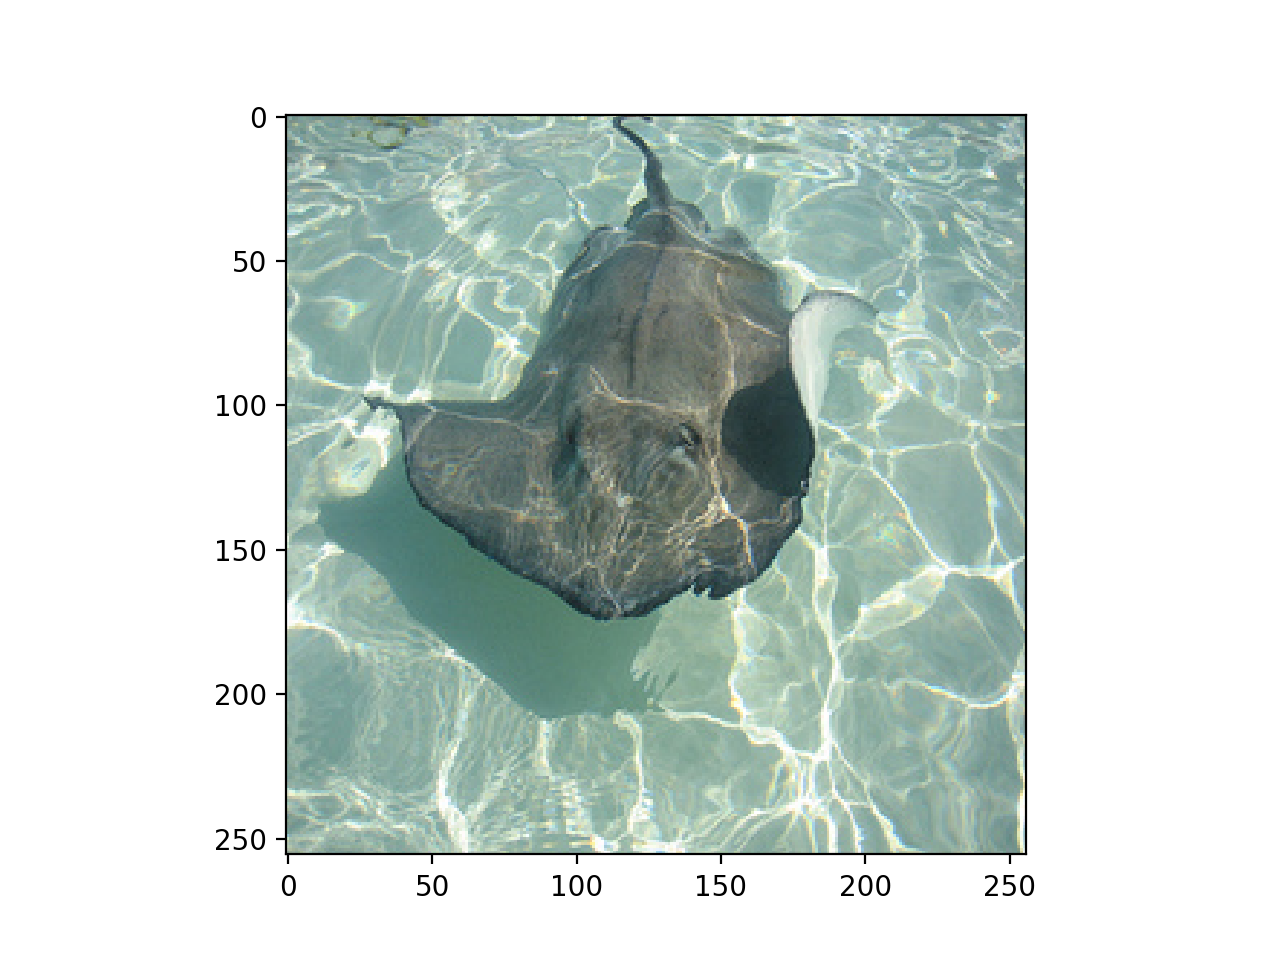

<IPython.core.display.Javascript object>


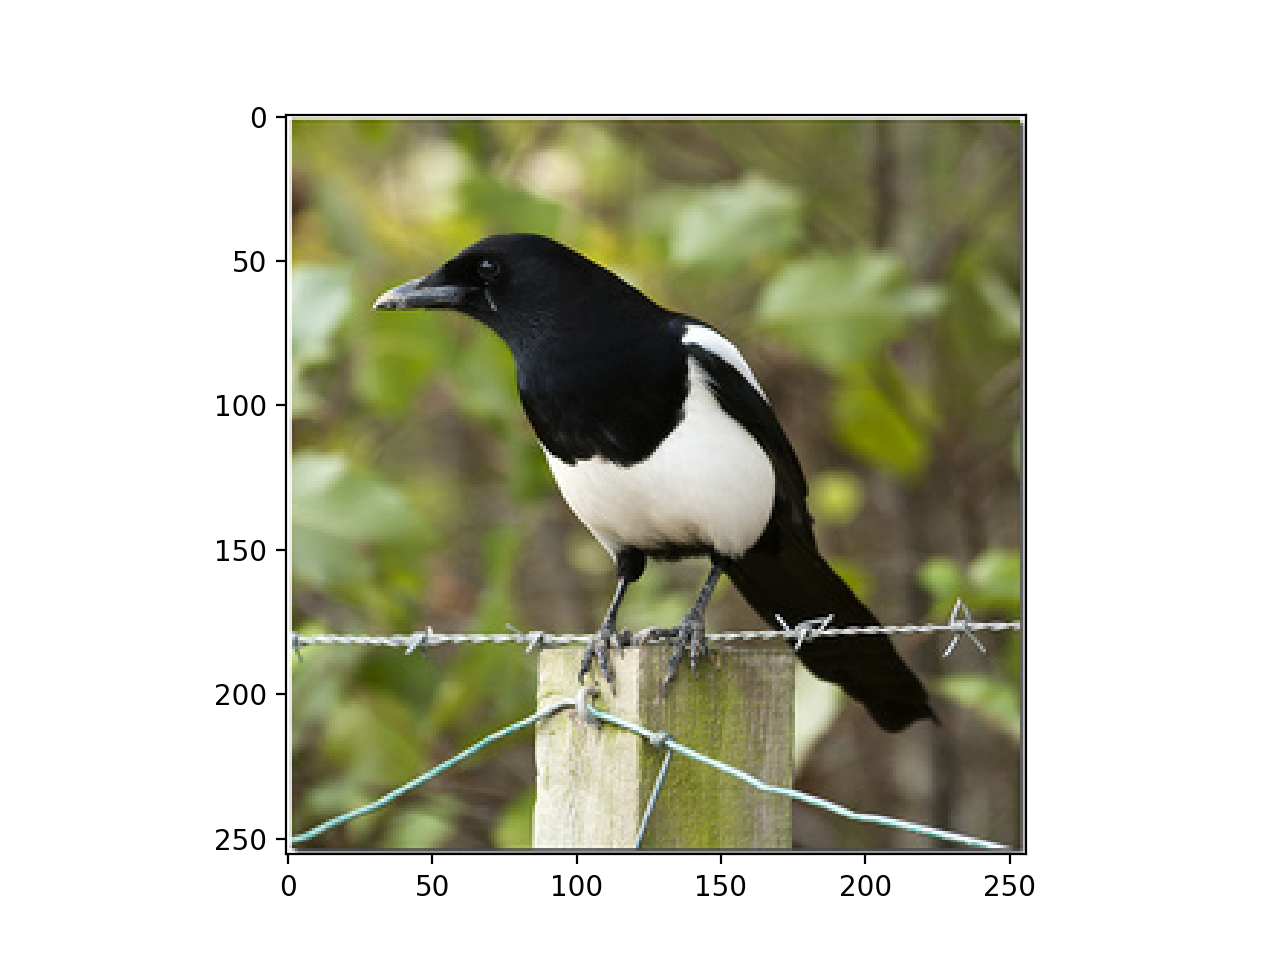

<IPython.core.display.Javascript object>


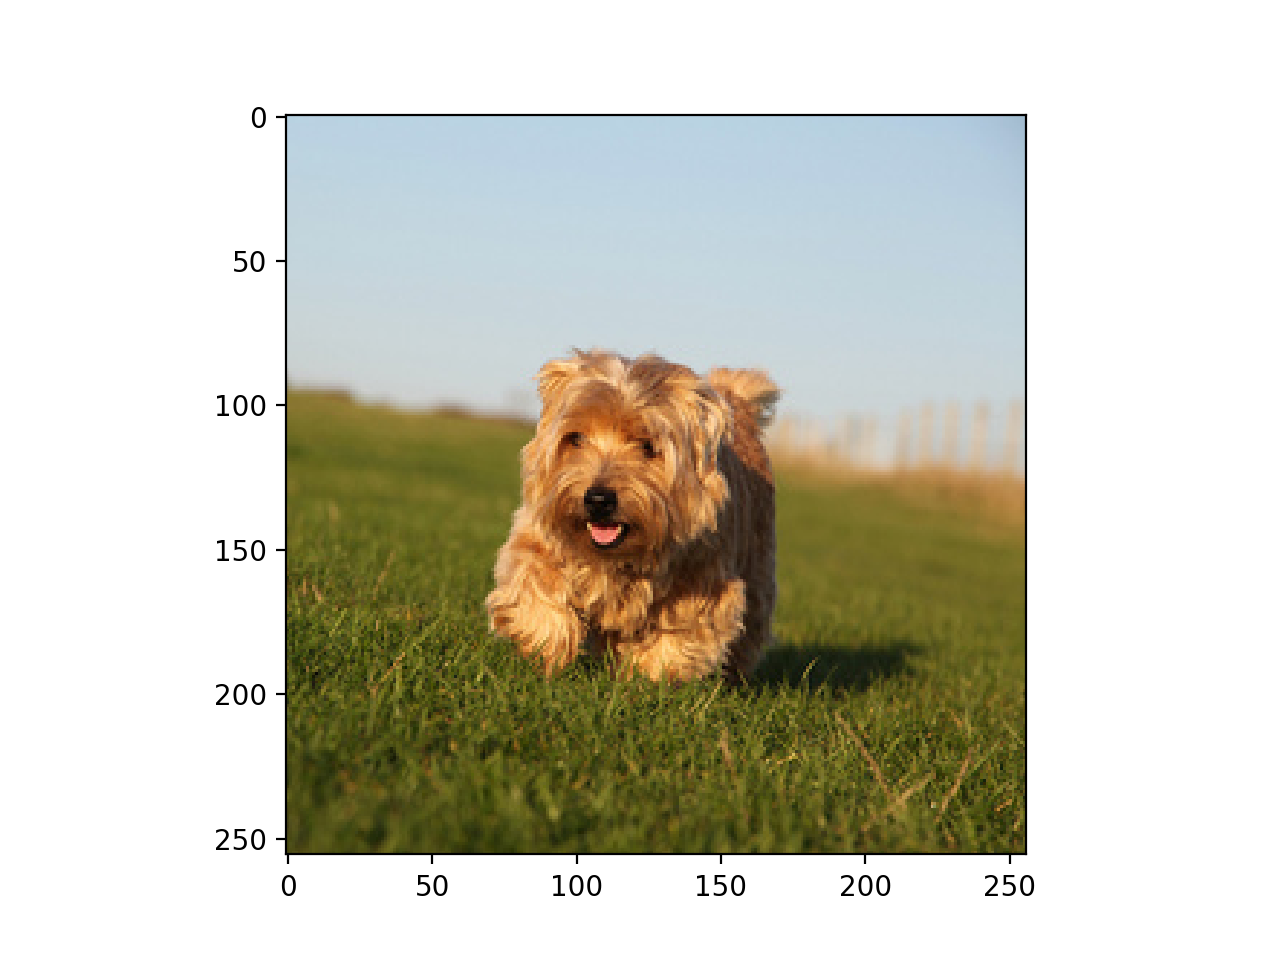

In [23]:
filenames = ['ILSVRC2012_val_00005870.JPEG', 'n01443537_8401.JPEG', 'n01498041_13465.JPEG', 'n01498041_11953.JPEG', 'ILSVRC2012_test_00000002.JPEG', 'ILSVRC2012_test_00000004.JPEG']

tmp_res = imgnet.load_image_batch(filenames, size='scaled_256')

for fn in filenames:
    plt.figure()
    plt.imshow(tmp_res[fn])
    plt.show()

## Retrieving image data for an entire class

To minimize IO operations, the ImageNetData class also supports loading all images for one class at the same time.

### Training set classes

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-train/n01498041-scaled.tar ... done


<IPython.core.display.Javascript object>


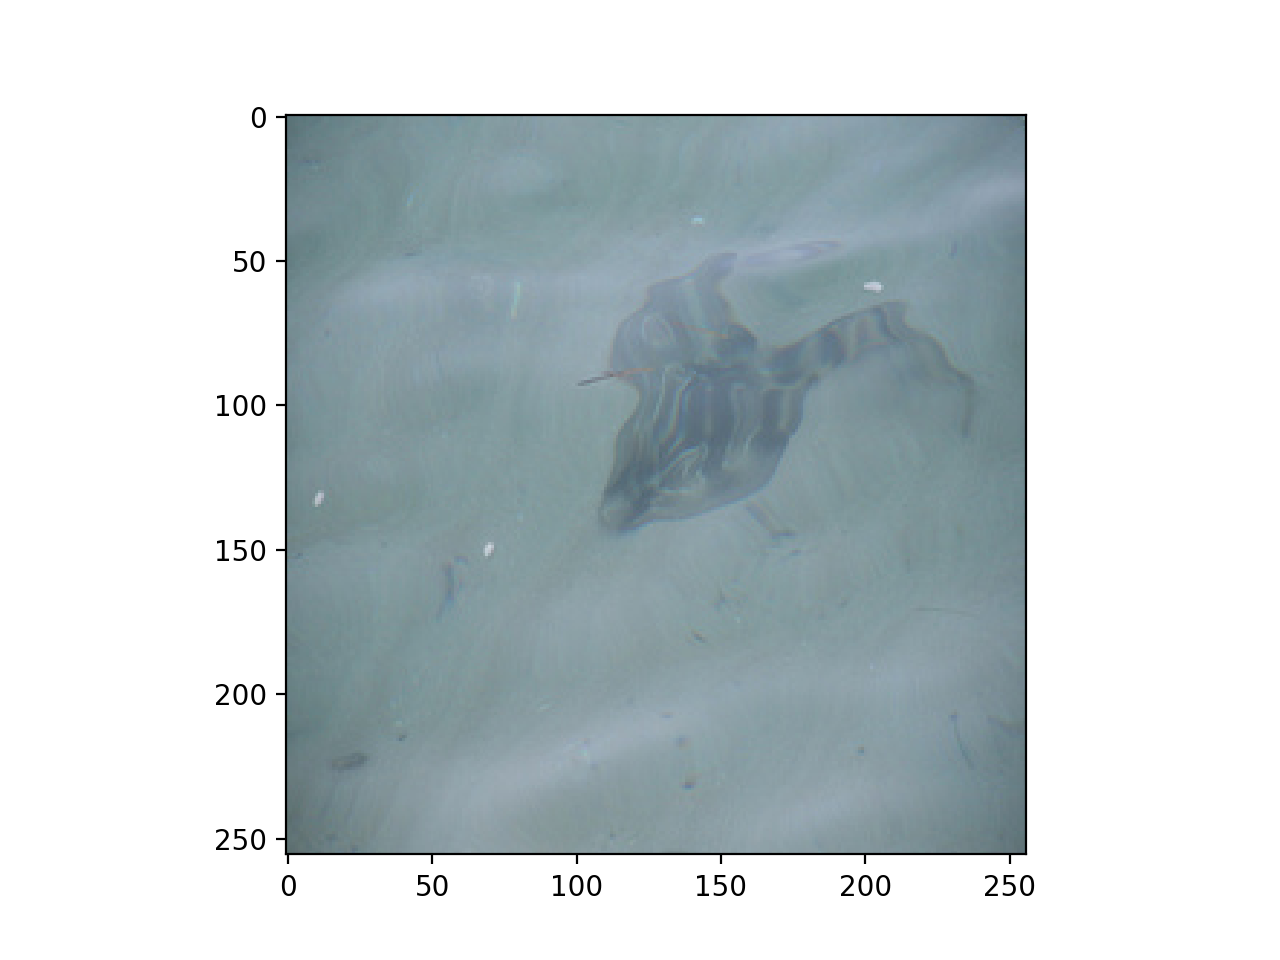

<IPython.core.display.Javascript object>


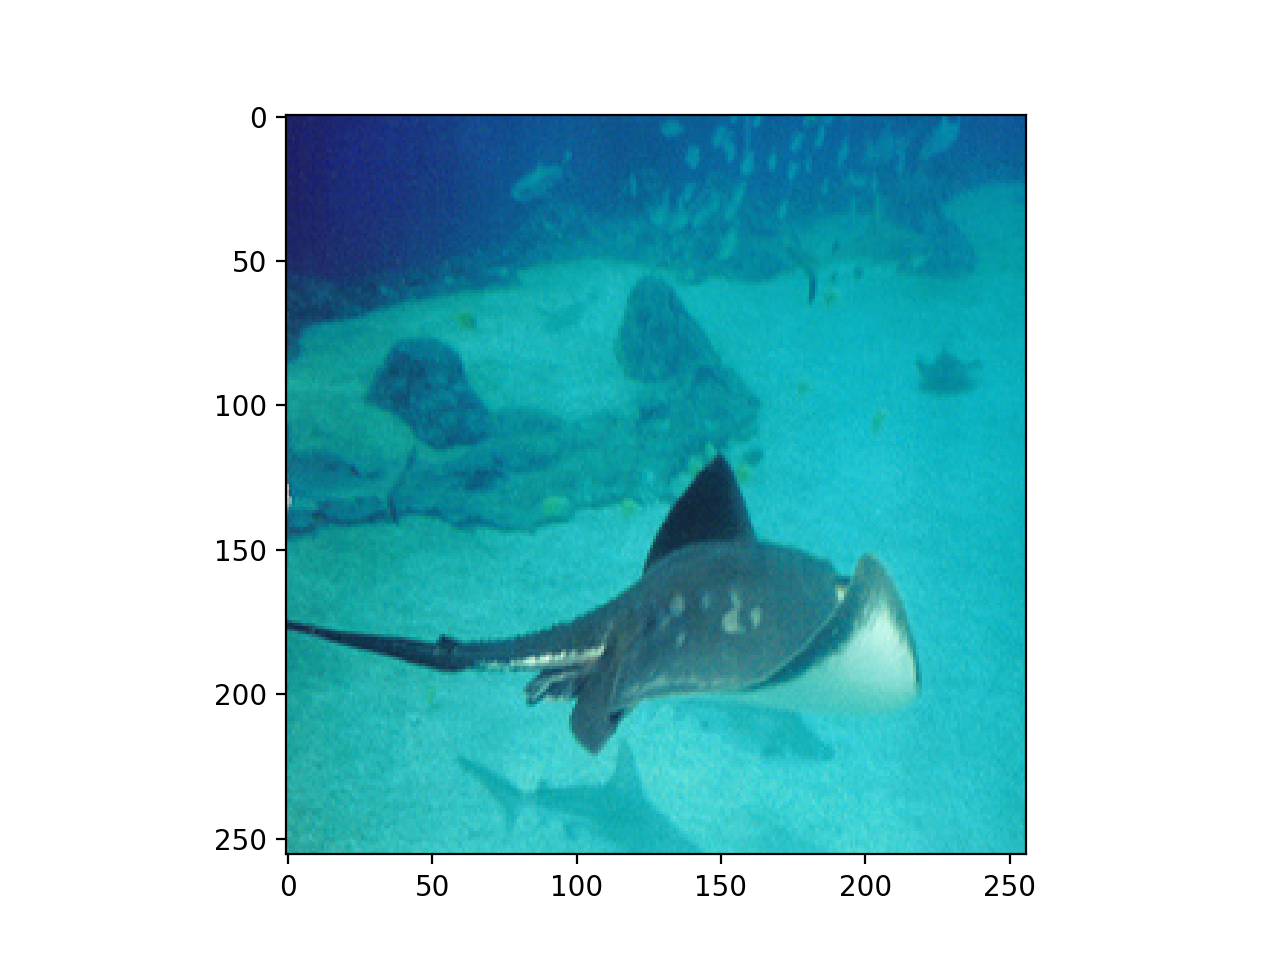

<IPython.core.display.Javascript object>


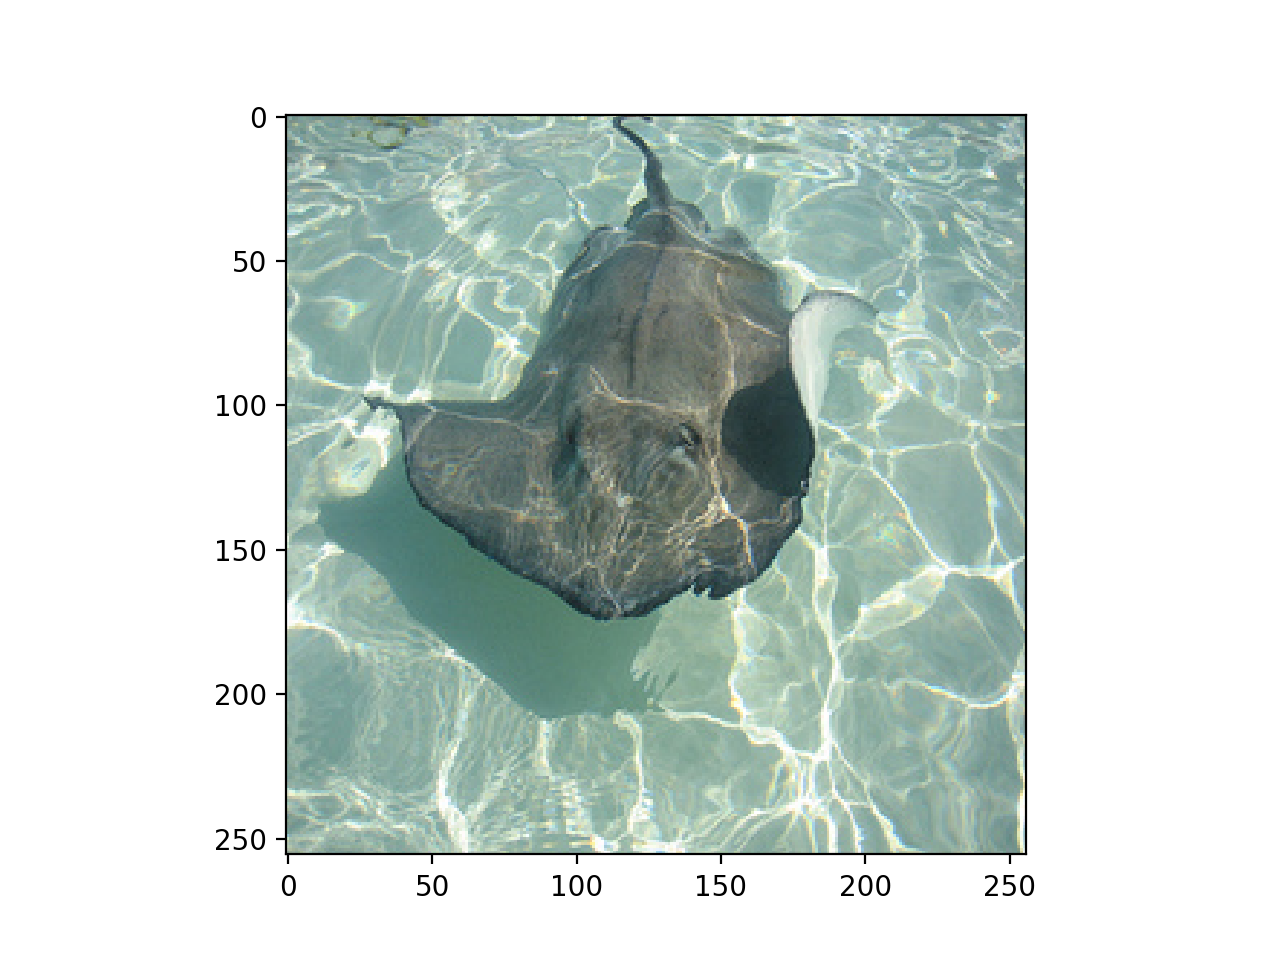

In [24]:
filenames = imgnet.train_imgs_by_wnid['n01498041'][:105]

result = imgnet.load_image_batch(filenames, size='scaled_256')

for fn in filenames[:3]:
    plt.figure()
    plt.imshow(result[fn])
    plt.show()

### Validation set classes

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-validation/val-n01498041-scaled.tar ... done


<IPython.core.display.Javascript object>


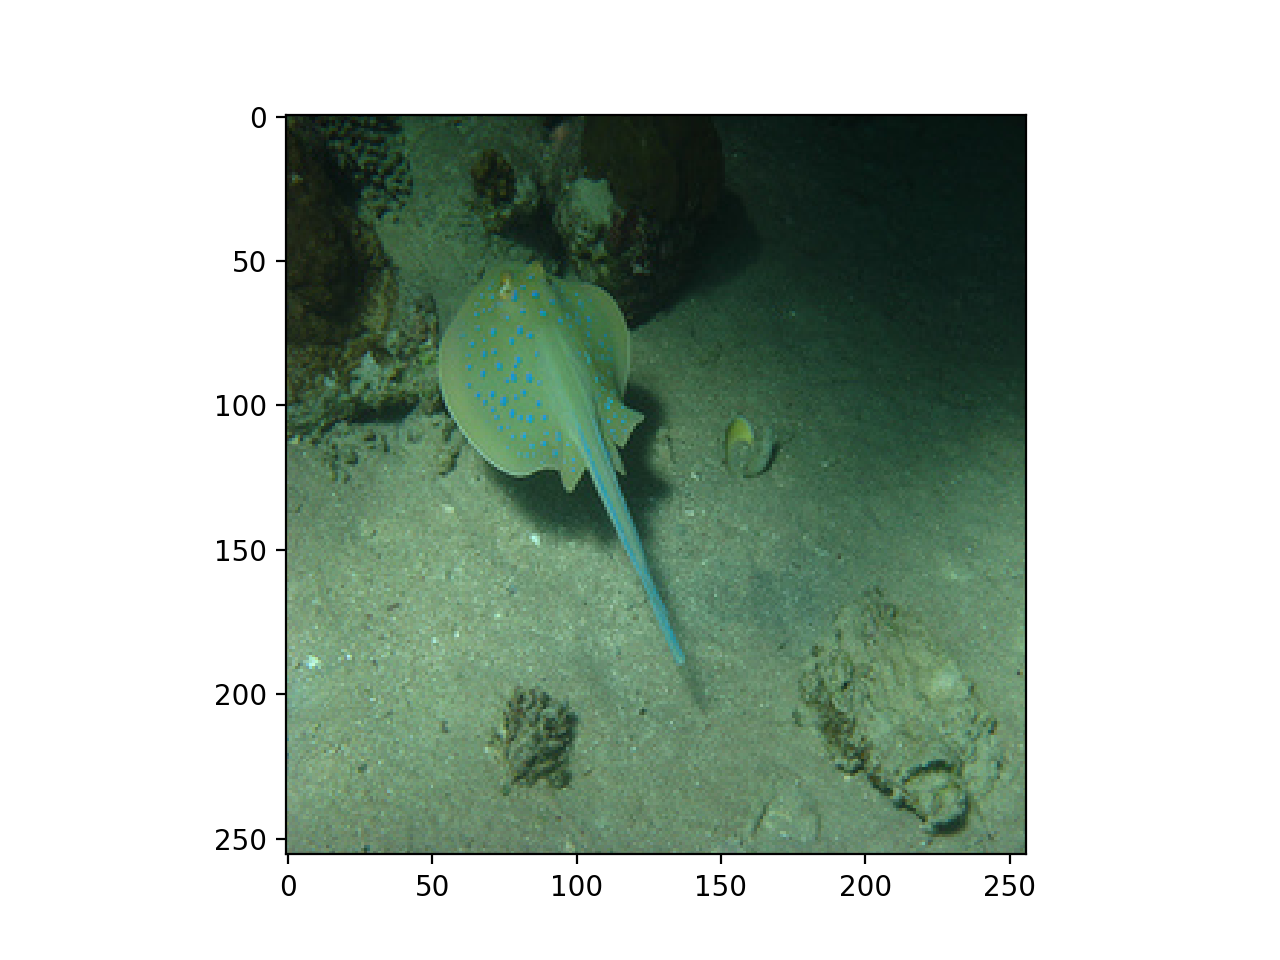

<IPython.core.display.Javascript object>


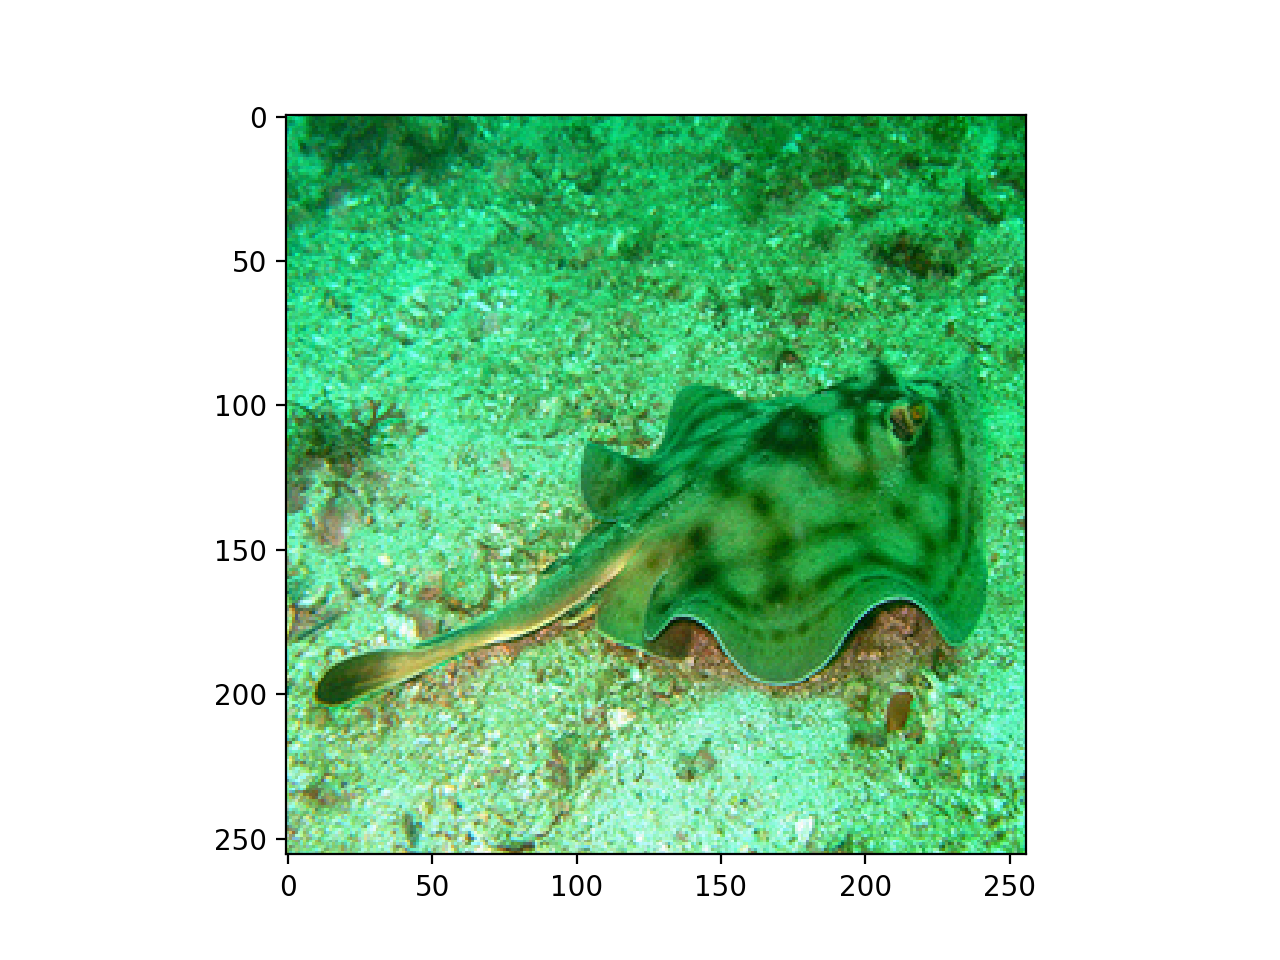

<IPython.core.display.Javascript object>


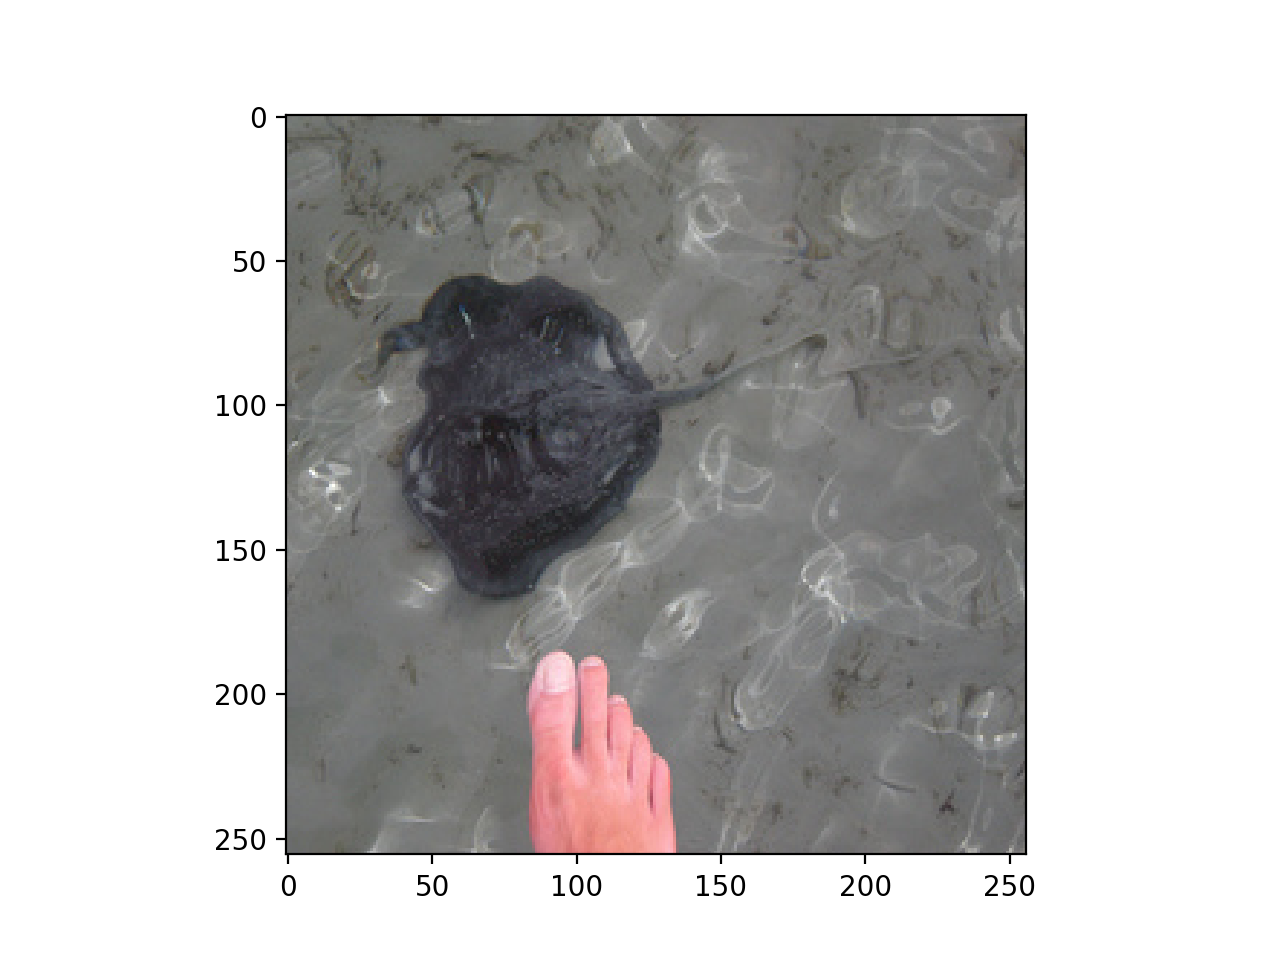

In [25]:
filenames = imgnet.val_imgs_by_wnid['n01498041'][:105]

result = imgnet.load_image_batch(filenames, size='scaled_256')

for fn in filenames[:3]:
    plt.figure()
    plt.imshow(result[fn])
    plt.show()

### Batch loading of test images

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-test-batches/66210c7d1a50f1349be7b9577f421130b34636ea512b6466c2c9f7eb2408cc23.pickle ... done


<IPython.core.display.Javascript object>


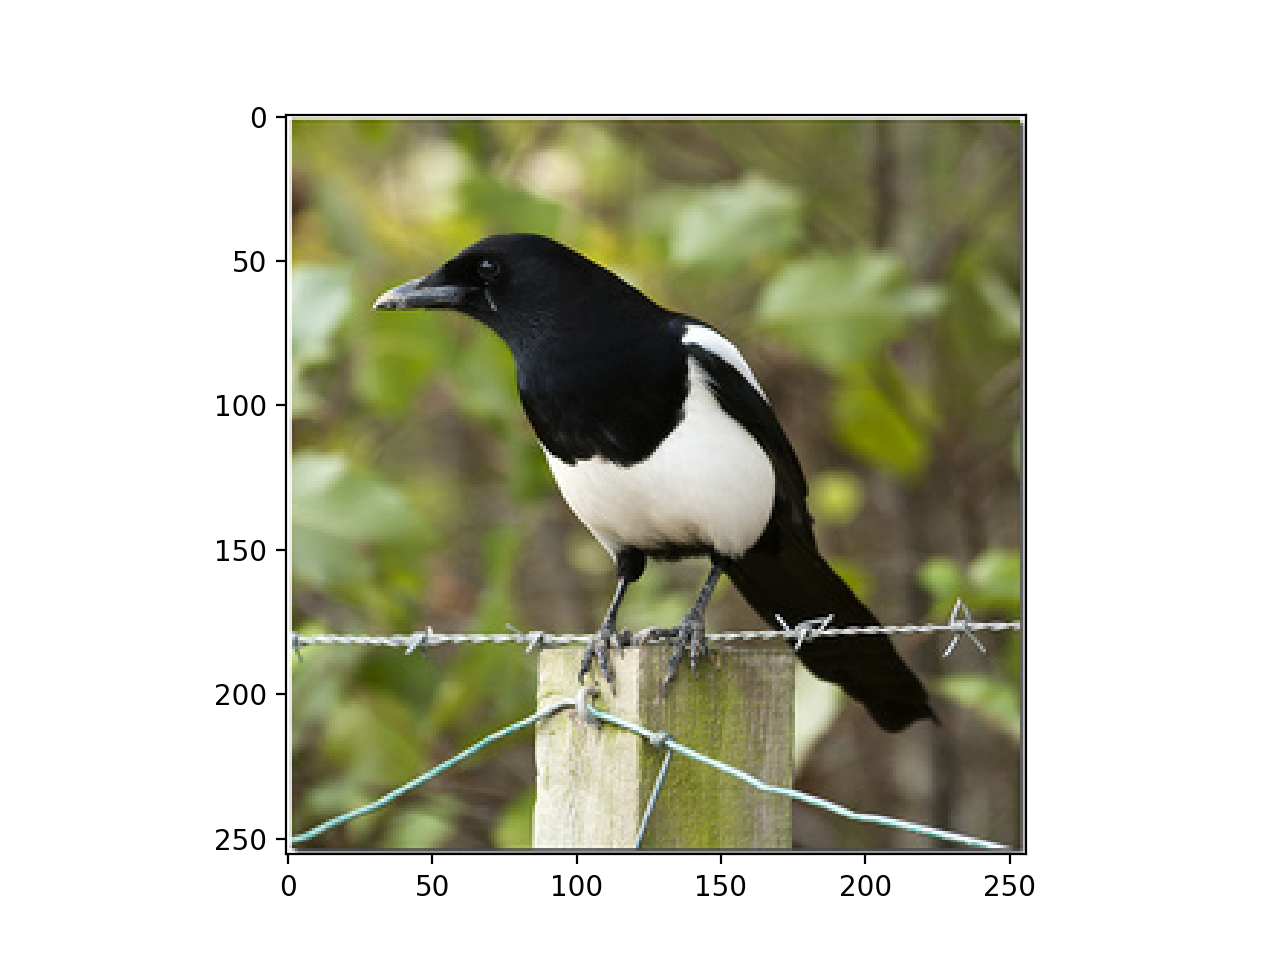

<IPython.core.display.Javascript object>


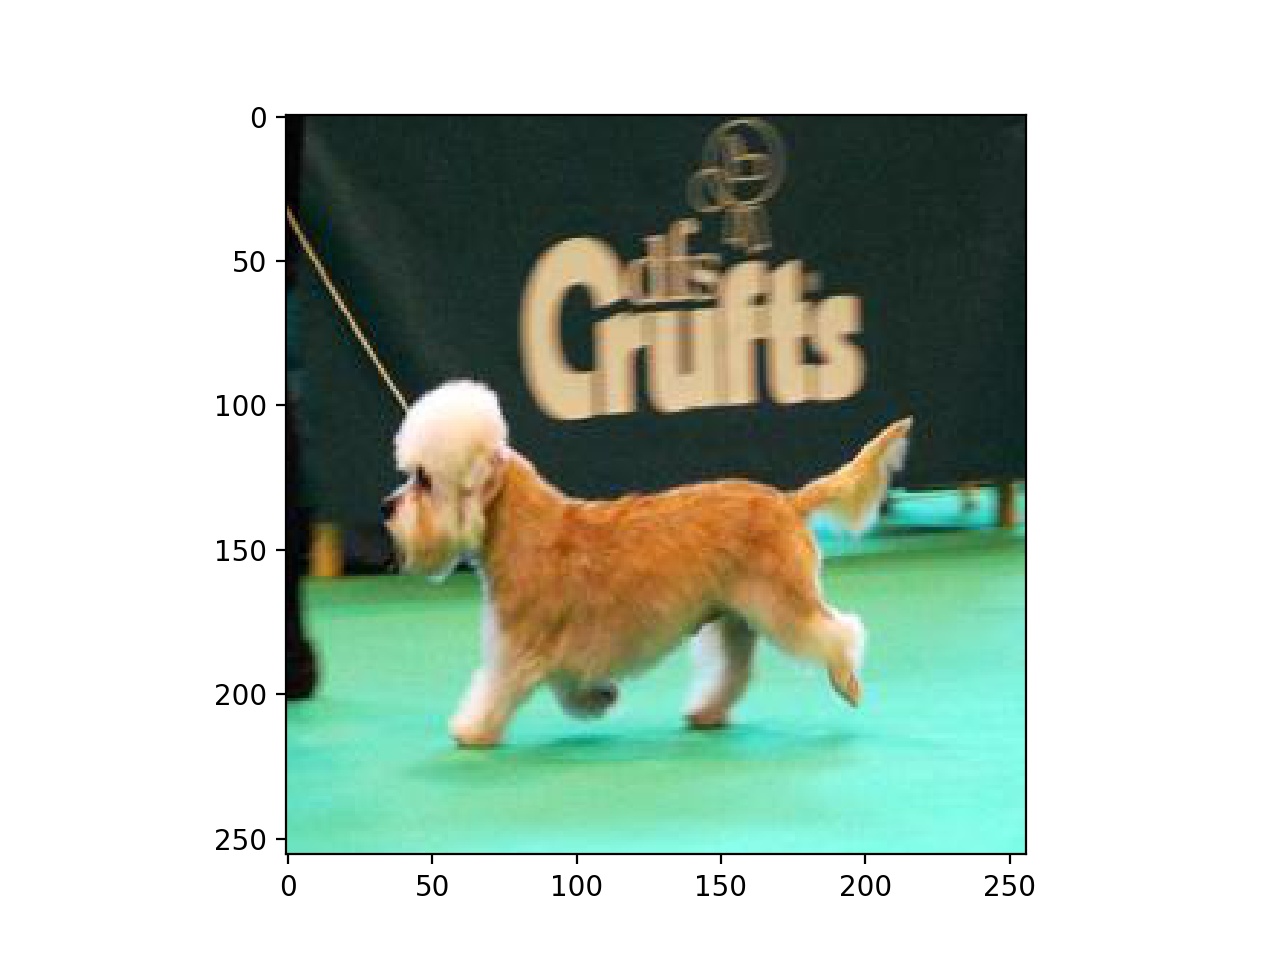

<IPython.core.display.Javascript object>


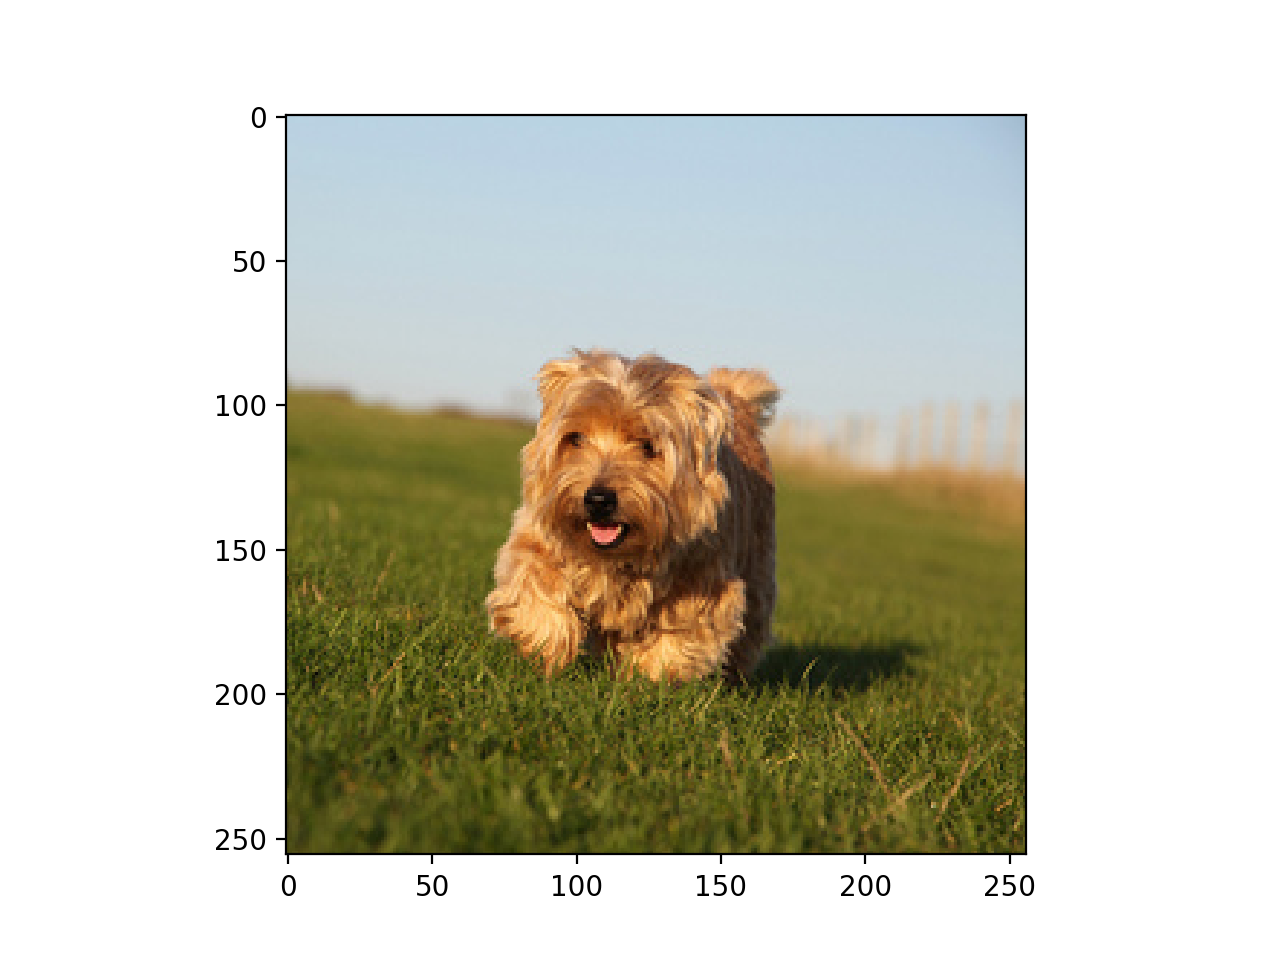

In [26]:
filenames = imgnet.test_filenames[1:105]

result = imgnet.load_image_batch(filenames, size='scaled_256')

for fn in filenames[:3]:
    plt.figure()
    plt.imshow(result[fn])
    plt.show()

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-test-scaled/ILSVRC2012_test_00000002.JPEG ... done
Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-test-scaled/ILSVRC2012_test_00000003.JPEG ... done


<IPython.core.display.Javascript object>


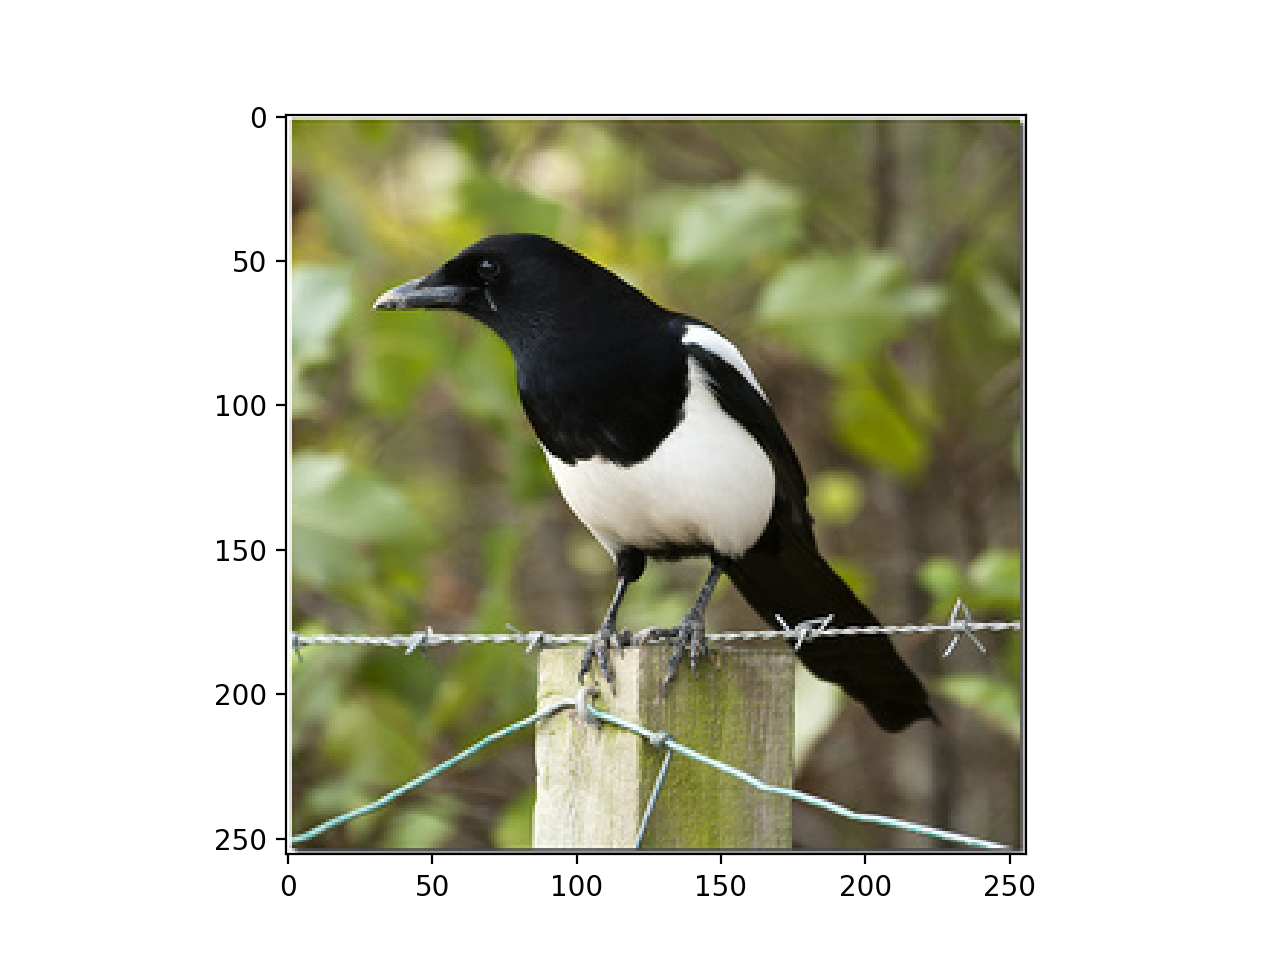

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


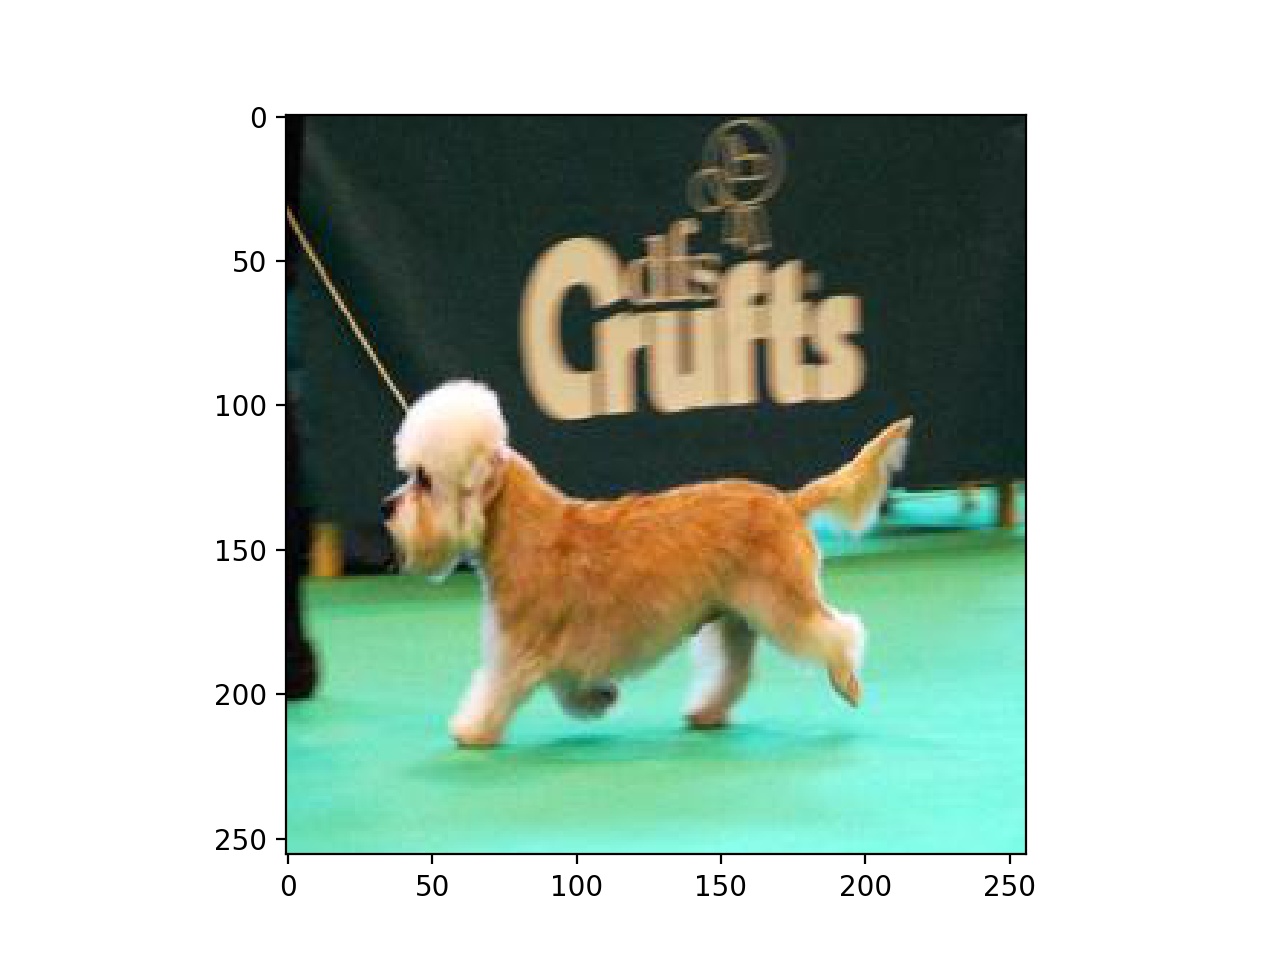

In [27]:
filenames = imgnet.test_filenames[1:3]

result = imgnet.load_image_batch(filenames, size='scaled_256')

for fn in filenames:
    plt.figure()
    plt.imshow(result[fn])
    plt.show()

## Class metadata information
The ImageNetData class also loads metadata about the classes by default. In particular, the object contains maps
from class ID (integer between 0 and 999, short "cid") and from WordNet ID (short "wnid") to a ClassInfo object. Each
ClassInfo object contains the following fields:
* wnid
* cid
* synset (a Python list of synonyms)
* wikipedia_pages (a Python list of relevant URLs of Wikipedia pages as stored in `metadata/wikipedia_pages.json`)
* gloss (as in the ImageNet gloss.txt file)

In [28]:
ci = imgnet.class_info_by_wnid['n01498041']
ci

ClassInfo(wnid='n01498041', cid=6, synset=['stingray'], wikipedia_pages=['https://en.wikipedia.org/wiki/Stingray'], gloss='large venomous ray with large barbed spines near the base of a thin whiplike tail capable of inflicting severe wounds')

In [29]:
ci = imgnet.class_info_by_cid[0]
ci

ClassInfo(wnid='n01440764', cid=0, synset=['tench', 'Tinca tinca'], wikipedia_pages=['https://en.wikipedia.org/wiki/Tench'], gloss='freshwater dace-like game fish of Europe and western Asia noted for ability to survive outside water')

In [30]:
imgnet.get_wordnet_url('n01498041')

'http://wordnet-rdf.princeton.edu/pwn30/01498041-n'

### Searching through classes

In [31]:
imgnet.search_classes('goldfish')

[ClassInfo(wnid='n01443537', cid=1, synset=['goldfish', 'Carassius auratus'], wikipedia_pages=['https://en.wikipedia.org/wiki/Goldfish'], gloss='small golden or orange-red freshwater fishes of Eurasia used as pond or aquarium fishes')]

## Downloading image features

The ImageNetData object also supports downloading image features for a given image.

### Training set features

In [32]:
tmpfeatures = imgnet.load_features('n01443537_8401.JPEG')
print('Result shape: {}'.format(tmpfeatures.shape))

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-train-featurized/n01443537-fc7.pkl ... done
Result shape: (4096,)


In [33]:
filenames = imgnet.train_imgs_by_wnid['n01498041'][:105]
tmpres = imgnet.load_features_batch(filenames)
res_d = len(list(tmpres.values())[0])
for v in tmpres.values():
    assert len(v) == res_d
print('Number of entries {}, all with dimension {}.'.format(len(tmpres), res_d))

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-train-featurized/n01498041-fc7.pkl ... done
Number of entries 105, all with dimension 4096.


### Validation set features

In [34]:
tmpfeatures = imgnet.load_features('ILSVRC2012_val_00005870.JPEG')
print('Result shape: {}'.format(tmpfeatures.shape))

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-validation-featurized/val-n01443537-fc7.pkl ... done
Result shape: (4096,)


In [35]:
tmpres = imgnet.load_features_batch(['ILSVRC2012_val_00008952.JPEG', 'ILSVRC2012_val_00002284.JPEG', 'ILSVRC2012_val_00036118.JPEG', 'ILSVRC2012_val_00024719.JPEG', 'ILSVRC2012_val_00042534.JPEG'])
res_d = len(list(tmpres.values())[0])
for v in tmpres.values():
    assert len(v) == res_d
print('Number of entries {}, all with dimension {}.'.format(len(tmpres), res_d))

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-validation-featurized/val-n01498041-fc7.pkl ... done
Number of entries 5, all with dimension 4096.


### Test set features

In [36]:
tmpfeatures = imgnet.load_features('ILSVRC2012_test_00000002.JPEG')
print('Result shape: {}'.format(tmpfeatures.shape))

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-test-featurized/ILSVRC2012_test_00000002.JPEG.npy ... done
Result shape: (4096,)


### Unified feature loading

In [37]:
filenames = ['ILSVRC2012_val_00005870.JPEG', 'n01443537_8401.JPEG', 'n01498041_13465.JPEG', 'n01498041_11953.JPEG']

tmpres = imgnet.load_features_batch(filenames)

res_d = len(list(tmpres.values())[0])
for v in tmpres.values():
    assert len(v) == res_d
print('Number of entries {}, all with dimension {}.'.format(len(tmpres), res_d))

Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-train-featurized/n01443537-fc7.pkl ... done
Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-train-featurized/n01498041-fc7.pkl ... done
Reading from local file /Users/ludwig/research/deep_learning/imagenet_2/data/cache/imagenet-validation-featurized/val-n01443537-fc7.pkl ... done
Number of entries 4, all with dimension 4096.
